# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [3]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [4]:
len(df)

4998

Product_Category_3  , Product_Category_2는 매우 높은 비율의 결측값을 가짐
-> 제거하기

In [5]:
df=df.drop("Product_Category_3",axis=1)
df=df.drop("Product_Category_2",axis=1)

eda 하기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     4998 non-null   int64 
 1   Product_ID                  4998 non-null   object
 2   Gender                      4998 non-null   object
 3   Age                         4998 non-null   object
 4   Occupation                  4998 non-null   int64 
 5   City_Category               4998 non-null   object
 6   Stay_In_Current_City_Years  4998 non-null   object
 7   Marital_Status              4998 non-null   int64 
 8   Product_Category_1          4998 non-null   int64 
 9   Purchase                    4998 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 429.5+ KB


In [10]:
df.nunique()  #수치형으로써 의미를가지는 데이터는 purchase뿐인것같음

User_ID                       2656
Product_ID                    1797
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              20
Purchase                      3736
dtype: int64

In [11]:
c=['Occupation','Marital_Status','Product_Category_1']
for i in c:
    df[i]=df[i].astype(str) #나머지는 object 형으로 변환하기

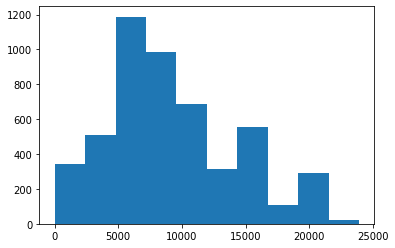

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(1,1)
ax.hist(df['Purchase'])
plt.show()

In [ ]:
df=df.drop("User_ID",axis=1) #userid는 무의마한 변수라 삭제

In [21]:
df=df.drop("Product_ID",axis=1) #Product_ID도 너무 많아서 삭제하기

In [22]:
df['Age']

0       0-17
1       0-17
2       0-17
3       0-17
4       0-17
        ... 
4993     55+
4994     55+
4995     55+
4996     55+
4997     55+
Name: Age, Length: 4998, dtype: object

<AxesSubplot:xlabel='Age', ylabel='count'>

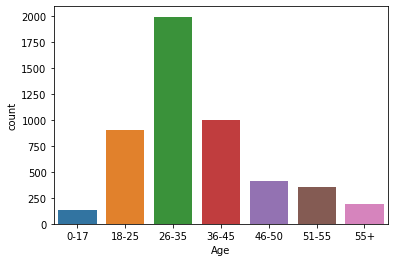

In [24]:
fig,ax=plt.subplots(1,1)
v=df['Age'].value_counts()
sns.countplot(x='Age',data=df)

주로 2-30대 , 3-40대에서 소비가 많이 이루어짐

<AxesSubplot:xlabel='Age', ylabel='count'>

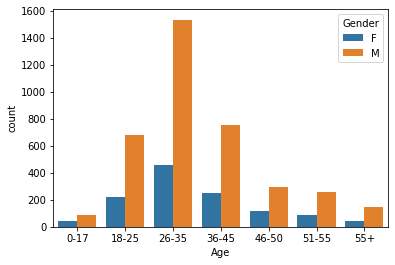

In [25]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='Age',data=df,hue='Gender')

모든 연령대에선 남자가 더 많이 소비함

<AxesSubplot:xlabel='Occupation', ylabel='count'>

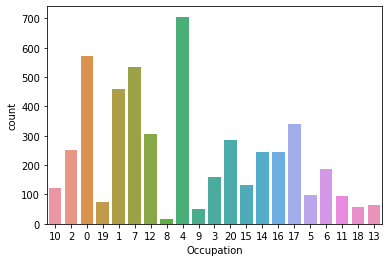

In [27]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='Occupation',data=df)

Occupation는 딱히 패턴을 모르겠음

<AxesSubplot:xlabel='City_Category', ylabel='count'>

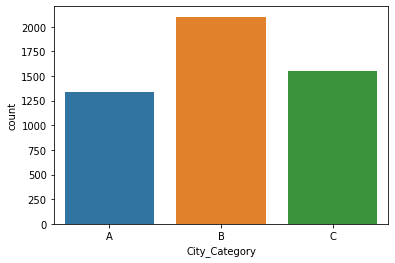

In [29]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='City_Category',data=df)

B도시에서 구매가 가장 많이 이뤄짐

<AxesSubplot:xlabel='City_Category', ylabel='count'>

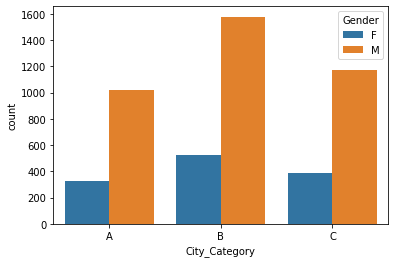

In [30]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='City_Category',data=df,hue='Gender')

마찬가지로 남자가 여자보다 더 많이 구매함

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

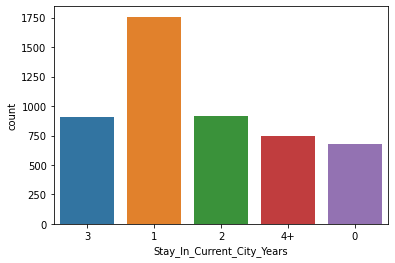

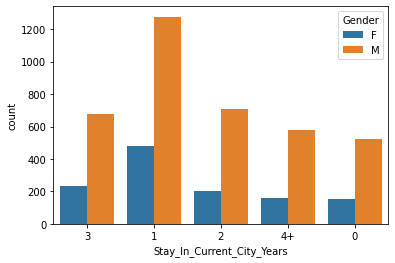

In [33]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='Stay_In_Current_City_Years',data=df)
fig,ax=plt.subplots(1,1)
sns.countplot(x='Stay_In_Current_City_Years',data=df,hue='Gender')

거주기간 1년차가 가장 구매 많이함

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

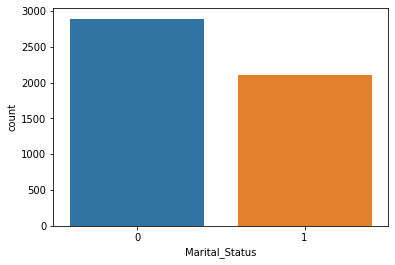

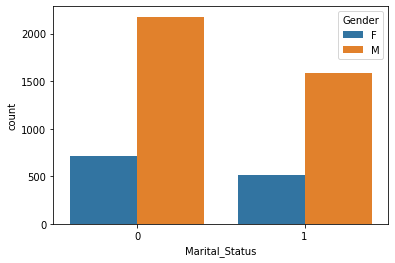

In [34]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='Marital_Status',data=df)
fig,ax=plt.subplots(1,1)
sns.countplot(x='Marital_Status',data=df,hue='Gender')

결혼 안한 사람들이 더 구매 많이함

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

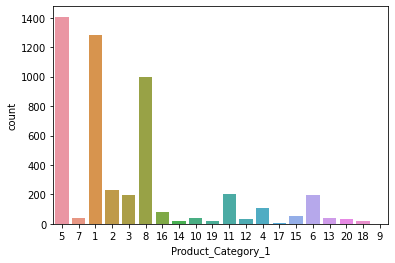

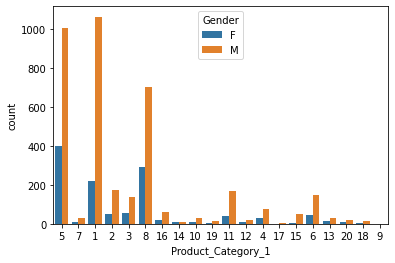

In [35]:
fig,ax=plt.subplots(1,1)
sns.countplot(x='Product_Category_1',data=df)
fig,ax=plt.subplots(1,1)
sns.countplot(x='Product_Category_1',data=df,hue='Gender')

product_category1dms 5,1,8이 가장 많음

In [45]:
#모델링 진행
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,F,0-17,10,A,3,0,5,2010
1,F,0-17,10,A,1,0,7,4483
2,F,0-17,10,A,1,0,1,7696
3,F,0-17,10,A,3,0,2,16429
4,F,0-17,10,A,3,0,3,5780
...,...,...,...,...,...,...,...,...
4993,M,55+,7,C,1,1,1,11701
4994,M,55+,1,C,1,1,8,2045
4995,M,55+,13,C,3,1,1,4505
4996,M,55+,0,C,2,1,12,1413


In [46]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [47]:
from sklearn.preprocessing import LabelEncoder 

# y값 타겟변수 라벨 인코딩 해주기
le = LabelEncoder()

y = le.fit_transform(y)

In [48]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                   shuffle = True,
                                                   random_state = 42,
                                                   stratify = y)


In [52]:
import numpy as np
from sklearn.preprocessing import StandardScaler
#knn은 척도에 민감-> 스케일링 해줘야함
scaler = StandardScaler()

X_train.loc[:, 'Purchase'] = scaler.fit_transform(np.array(X_train['Purchase']).reshape(-1, 1))
X_test.loc[:, 'Purchase'] = scaler.transform(np.array(X_test['Purchase']).reshape(-1, 1))

원 핫 인코딩 진행하기

In [56]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

X_all = pd.concat([X_train, X_test], axis = 0).reset_index(drop=True)

ohe.fit(X_all[['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']])

OneHotEncoder(sparse=False)

In [58]:
nexx=ohe.transform(X_all[['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']])
ohe

(4998, 58)

In [59]:
ohe_columns = ohe.categories_[0].tolist()

In [60]:
for idx in range(len(ohe.categories_)-1):
    ohe_columns += ohe.categories_[idx+1].tolist()
    
len(ohe_columns)

58

In [61]:
X_cat = pd.DataFrame(nexx, columns = ohe_columns)
X_cat.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,1,10,...,19,2,20,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
X_all.drop(columns=['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1'], inplace=True)
#기존 변수들 제거

In [64]:
X = pd.concat([X_all, X_cat], axis = 1)
#원핫인코딩된 변수들을 사용

In [65]:
# train, test 데이터 분리
X_train = X.iloc[:X_train.shape[0], :]
X_test = X.iloc[X_train.shape[0]:, :]

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.757


In [67]:
results = knn.predict(X_test)
results #예측값

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [68]:
from sklearn import metrics
print(metrics.classification_report(y_test,results, digits=2))

              precision    recall  f1-score   support

           0       0.51      0.28      0.36       247
           1       0.79      0.91      0.85       753

    accuracy                           0.76      1000
   macro avg       0.65      0.60      0.61      1000
weighted avg       0.73      0.76      0.73      1000



그리드 서치 진행

In [73]:
from sklearn.model_selection import GridSearchCV

knn=KNeighborsClassifier()
param_knn=[{'n_neighbors':range(3,10)}]
gs=GridSearchCV(estimator=knn,param_grid=param_knn, scoring='accuracy',cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(3, 10)}], scoring='accuracy')

In [74]:
print('베스트 하이퍼파라미터: {0}'.format(gs.best_params_))

베스트 하이퍼파라미터: {'n_neighbors': 9}


In [75]:
print('베스트 하이퍼파라미터일 떄 점수: {0}'.format(gs.best_score_))

베스트 하이퍼파라미터일 떄 점수: 0.7498707759699625
